### Name: Tarun Dadlani
### CWID: 20010209
### Class: CS513-B

In [53]:
# loading imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the data
cancer_data_df = pd.read_csv('breast-cancer-wisconsin.csv')

#Viewing the data
cancer_data_df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [54]:
# giving info about the data
cancer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [55]:
# summarizing data
cancer_data_df.describe()

,Sample,F1,F2,F3,F4,F5,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [56]:
# checking NaN/null value count
cancer_data_df = cancer_data_df.replace("?", np.NaN)
cancer_data_df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [57]:
# finding mean of the columns with null values
cancer_data_df['F6'] = pd.to_numeric(cancer_data_df['F6'])
F6_MEAN = cancer_data_df['F6'].mean()

# replacing null with mean
cancer_data_df['F6'] = cancer_data_df['F6'].fillna(F6_MEAN)
cancer_data_df['F6'] = cancer_data_df['F6'].astype(int)
cancer_data_df.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [58]:
# Displaying the frequency of 'Class' vs 'F6'
cancer_data_df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [59]:
# Displaying the frequency of 'class' vs 'F6'
cancer_data_df['F6'].value_counts()

F6
1     402
10    132
3      44
2      30
5      30
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [60]:
# displaying frequency table of "Class" vs "F6"
pd.crosstab(cancer_data_df['Class'], cancer_data_df['F6'])

F6,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,387,21,28,6,10,0,1,2,0,3
4,15,9,16,13,20,4,7,19,9,129


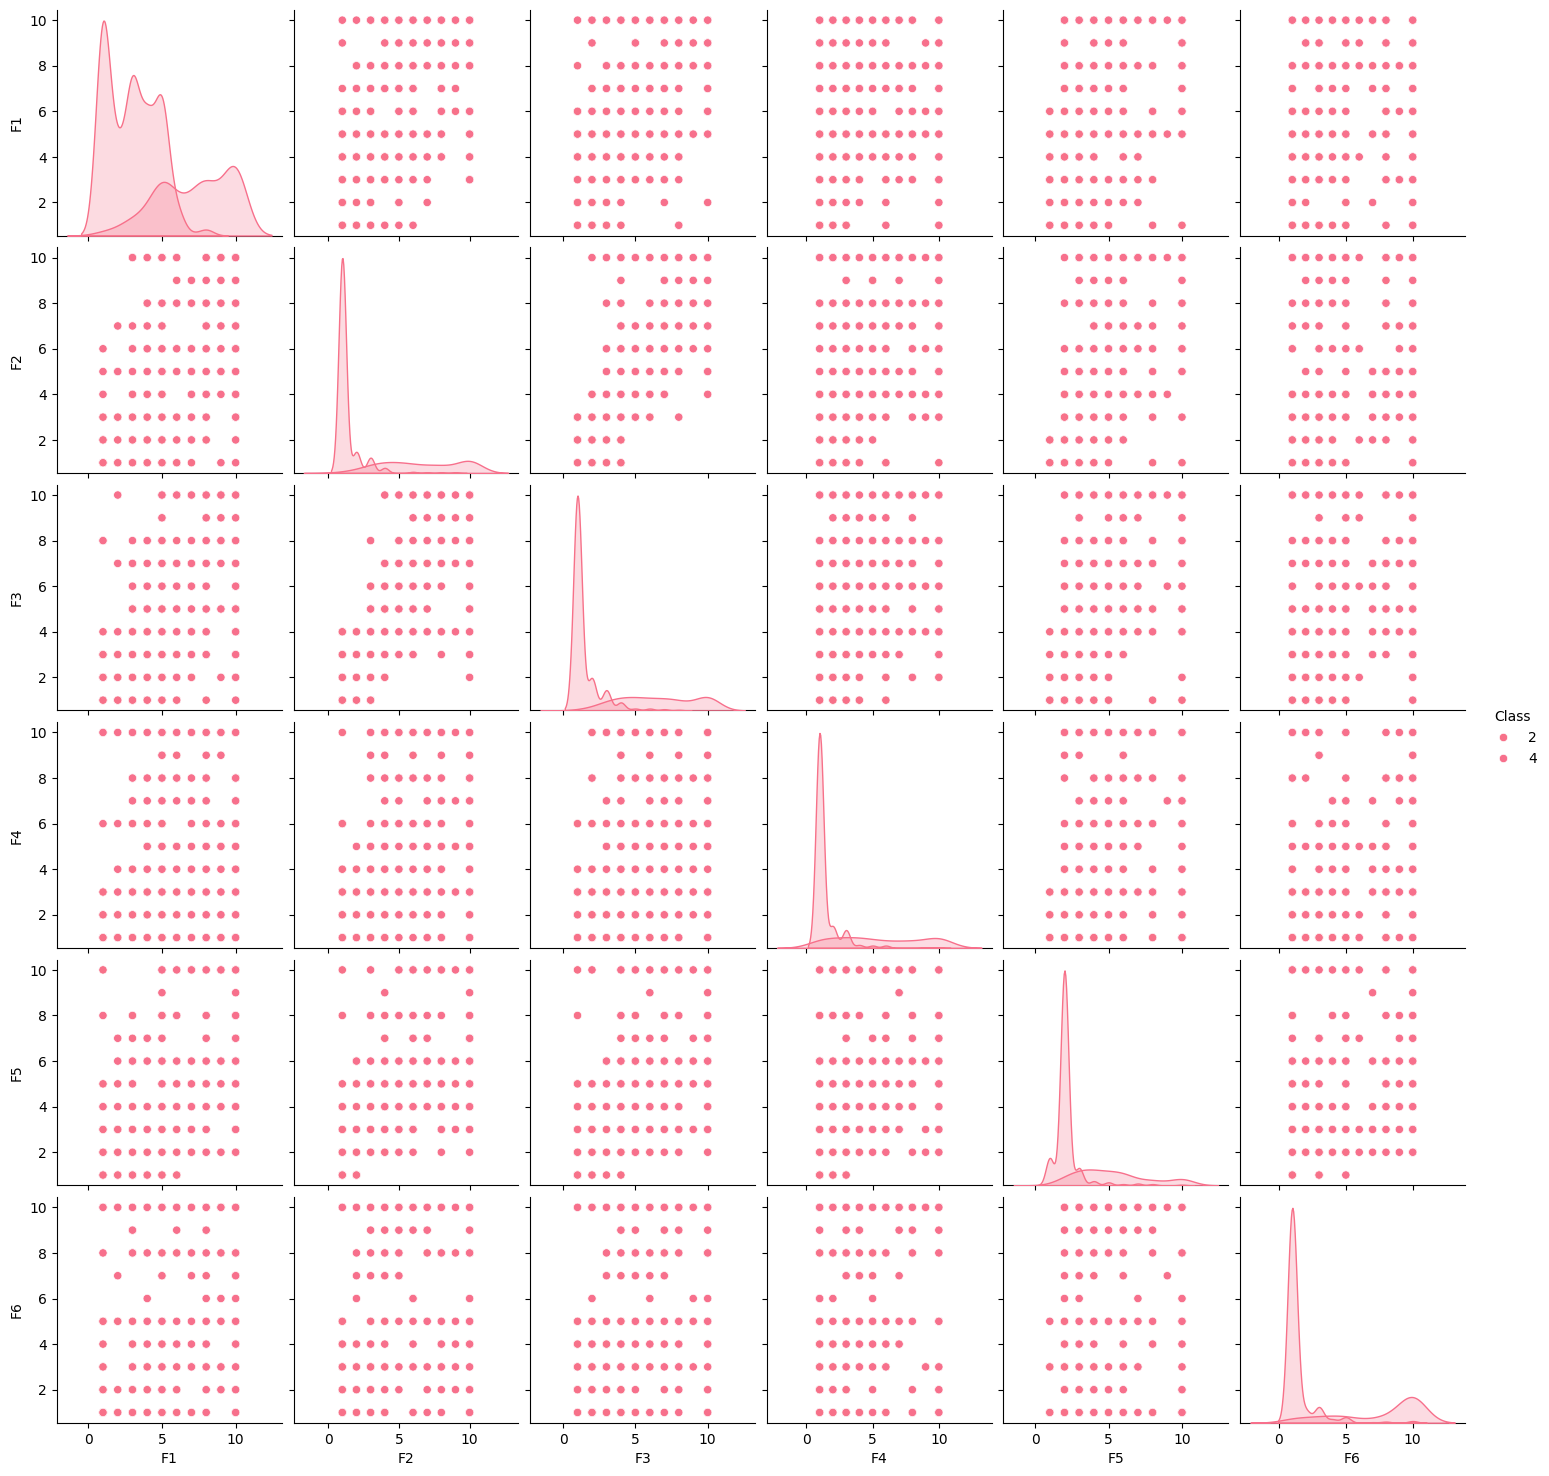

In [70]:
# displaying the scatter plot of F1 to F6, one pair at a time
sns.pairplot(cancer_data_df, hue='Class', palette="husl", vars=['F1', 'F2', 'F3', 'F4', 'F5', 'F6'])
plt.show()

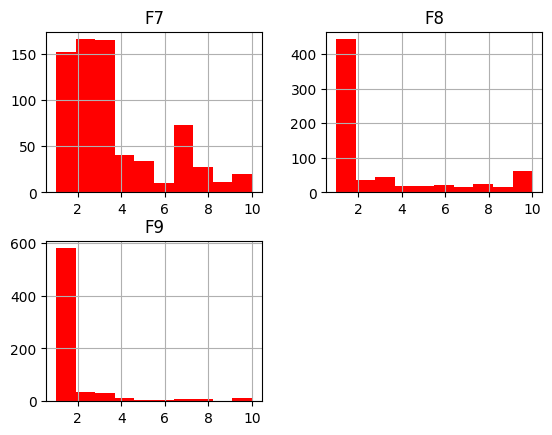

In [71]:
# Show histogram box plot for columns F7 to F9
cancer_data_df.hist(column=['F7', 'F8', 'F9'], color=['red'])
plt.show()

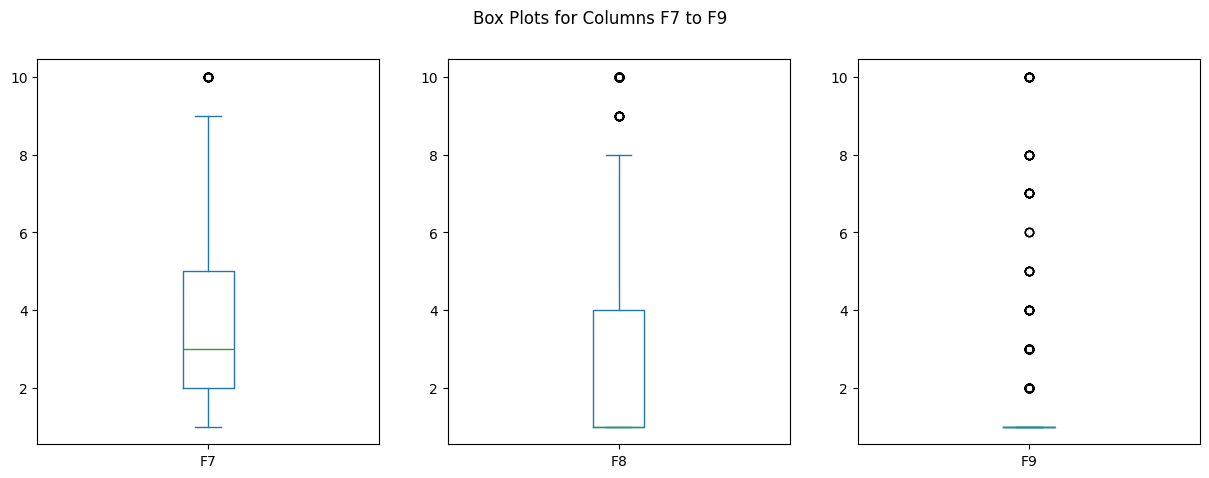

In [74]:
# Show histogram box plot for columns F7 to F9
columns_f7_to_f9 = cancer_data_df.iloc[:, 7:10]
columns_f7_to_f9.plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 5))
plt.suptitle("Box Plots for Columns F7 to F9")
plt.show()

In [64]:
# Reloading the csv
cancer_data_df_2 = pd.read_csv('breast-cancer-wisconsin.csv')
cancer_data_df_2.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [65]:
# checking null data
cancer_data_df_2 = cancer_data_df_2.replace("?", np.NaN)  # replace "?" with NaN
cancer_data_df_2.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [66]:
# removing null data
cancer_data_df_2 = cancer_data_df_2.dropna()
cancer_data_df_2.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64